### Preview
We're going to use VADER to do sentiment analysis. Before doing this step, make sure that you have data that has been translated into English first.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#### Showing Dataframe

In [20]:
#Analisis Sentimen VADER Initiation
df = pd.read_excel(r'initiation_preprocess to translate_preprocessed.xlsx')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Datetime,Tweet Id,Text,Username,Text_formal,text_cleaning,Text_punct,Text_lower,text_wo_emoticons,text_wo_emoji,text_wo_stop,text_translate
0,41,83,83,2015-07-30 19:18:48,6.268343e+17,Avanza bakal tampil dengan mesin baru yang leb...,BinandaSoraten,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza tampil mesin irit,Avanza appears economical engine
1,93,283,283,2015-07-30 16:40:43,6.267946e+17,Pkoknya. Nmpk jak avanza putih. Eih. Pkoknya a...,bubuibuy,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya seemed to be the white avanza eh uangn...
2,95,286,286,2015-07-30 16:37:31,6.267938e+17,Bsa plastik hihhhi versi avanza @midiahn @regg...,ladodeng,bisa plastik hihhhi versi avanza @midiahn @reg...,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,plastik hihhhi versi avanza,Avanza version of Hihhhi plastic
3,104,301,301,2015-07-30 16:17:15,6.267887e+17,Min @torabikacoffe ada undian mobil Avanza gak...,_punyanyali,min @torabikacoffe ada undian mobil avanza eng...,min ada undian mobil avanza enggak sih.? tema...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min undian mobil avanza sih teman kupon hadiah...,Min the Avanza car lottery is a gift coupon fr...
4,116,313,313,2015-07-30 15:33:07,6.267775e+17,"Ngomong-ngomong lipstik malatuslibu, kemaren a...",falla_adinda,"ngomong-ngomong lipstik malatuslibu, kemarin a...","ngomong-ngomong lipstik malatuslibu, kemarin a...",ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin tem...,Speaking of MalusLibu Lipstick Yesterday's Fri...


In [21]:
#If there is null data (NaN) in "Text" column, it would be converted into empty string ('')
df['text_translate'] = df['text_translate'].fillna('').apply(str)

#### Sentiment Analysis
First, we're going to find the polarity score of each tweet.

In [22]:
df['scores'] = df['text_translate'].apply(lambda Description: sid.polarity_scores(Description))
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Datetime,Tweet Id,Text,Username,Text_formal,text_cleaning,Text_punct,Text_lower,text_wo_emoticons,text_wo_emoji,text_wo_stop,text_translate,scores
0,41,83,83,2015-07-30 19:18:48,6.268343e+17,Avanza bakal tampil dengan mesin baru yang leb...,BinandaSoraten,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza tampil mesin irit,Avanza appears economical engine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,93,283,283,2015-07-30 16:40:43,6.267946e+17,Pkoknya. Nmpk jak avanza putih. Eih. Pkoknya a...,bubuibuy,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya seemed to be the white avanza eh uangn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,95,286,286,2015-07-30 16:37:31,6.267938e+17,Bsa plastik hihhhi versi avanza @midiahn @regg...,ladodeng,bisa plastik hihhhi versi avanza @midiahn @reg...,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,plastik hihhhi versi avanza,Avanza version of Hihhhi plastic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,104,301,301,2015-07-30 16:17:15,6.267887e+17,Min @torabikacoffe ada undian mobil Avanza gak...,_punyanyali,min @torabikacoffe ada undian mobil avanza eng...,min ada undian mobil avanza enggak sih.? tema...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min undian mobil avanza sih teman kupon hadiah...,Min the Avanza car lottery is a gift coupon fr...,"{'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'comp..."
4,116,313,313,2015-07-30 15:33:07,6.267775e+17,"Ngomong-ngomong lipstik malatuslibu, kemaren a...",falla_adinda,"ngomong-ngomong lipstik malatuslibu, kemarin a...","ngomong-ngomong lipstik malatuslibu, kemarin a...",ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin tem...,Speaking of MalusLibu Lipstick Yesterday's Fri...,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22128,54634,5454,900,2016-02-01 23:12:35,6.942973e+17,@ToyotaID saya beli inova terbaru ketika datan...,6a1275908ca145b,@toyotaid saya beli inova terbaru ketika datan...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,beli inova terbaru cek detail pas cuci mobil c...,buy the latest inova check detail when car was...,"{'neg': 0.165, 'neu': 0.682, 'pos': 0.153, 'co..."
22129,54635,5455,901,2016-02-01 13:40:05,6.941532e+17,@Tantan837 @detikoto @ToyotaID kalau kece itu...,viantmaulana,@tantan837 @detikoto @toyotaid kalau kece itu ...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kece mobilnya dikasih gratis kece hehehehe,kecenya car be given free kece hehehehe,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."
22130,546

Then, the polarity score would be converted into compound score. We're going to use compound score to classify each tweet into 'POSITIVE', 'NEGATIVE', and 'NEUTRAL'

In [23]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Datetime,Tweet Id,Text,Username,Text_formal,text_cleaning,Text_punct,Text_lower,text_wo_emoticons,text_wo_emoji,text_wo_stop,text_translate,scores,compound,sentiment_type
0,41,83,83,2015-07-30 19:18:48,6.268343e+17,Avanza bakal tampil dengan mesin baru yang leb...,BinandaSoraten,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza bakal tampil dengan mesin baru yang leb...,avanza tampil mesin irit,Avanza appears economical engine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,93,283,283,2015-07-30 16:40:43,6.267946e+17,Pkoknya. Nmpk jak avanza putih. Eih. Pkoknya a...,bubuibuy,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya. nampak jak avanza putih. eih. pokokny...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya nampak jak avanza putih eih pokoknya a...,pkoknya seemed to be the white avanza eh uangn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,95,286,286,2015-07-30 16:37:31,6.267938e+17,Bsa plastik hihhhi versi avanza @midiahn @regg...,ladodeng,bisa plastik hihhhi versi avanza @midiahn @reg...,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,bisa plastik hihhhi versi avanza,plastik hihhhi versi avanza,Avanza version of Hihhhi plastic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,104,301,301,2015-07-30 16:17:15,6.267887e+17,Min @torabikacoffe ada undian mobil Avanza gak...,_punyanyali,min @torabikacoffe ada undian mobil avanza eng...,min ada undian mobil avanza enggak sih.? tema...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min ada undian mobil avanza enggak sih teman ...,min undian mobil avanza sih teman kupon hadiah...,Min the Avanza car lottery is a gift coupon fr...,"{'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'comp...",0.8779,POSITIVE
4,116,313,313,2015-07-30 15:33:07,6.267775e+17,"Ngomong-ngomong lipstik malatuslibu, kemaren a...",falla_adinda,"ngomong-ngomong lipstik malatuslibu, kemarin a...","ngomong-ngomong lipstik malatuslibu, kemarin a...",ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin ada...,ngomongngomong lipstik malatuslibu kemarin tem...,Speaking of MalusLibu Lipstick Yesterday's Fri...,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",0.4939,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22128,54634,5454,900,2016-02-01 23:12:35,6.942973e+17,@ToyotaID saya beli inova terbaru ketika datan...,6a1275908ca145b,@toyotaid saya beli inova terbaru ketika datan...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,saya beli inova terbaru ketika datang enggak ...,beli inova terbaru cek detail pas cuci mobil c...,buy the latest inova check detail when car was...,"{'neg': 0.165, 'neu': 0.682, 'pos': 0.153, 'co...",-0.0516,NEGATIVE
22129,54635,5455,901,2016-02-01 13:40:05,6.941532e+17,@Tantan837 @detikoto @ToyotaID kalau kece itu...,viantmaulana,@tantan837 @detikoto @toyotaid kalau kece itu ...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kalau kece itu mobilnya dikasih gratis baru...,kece mobilnya dika

#### Getting Insight
We could know how many positive tweets, negative tweets, and neutral tweets that react to the object (Avanza car).

In [24]:
#jumlah tweet

df['sentiment_type'].value_counts()

NEUTRAL     9928
POSITIVE    8380
NEGATIVE    3825
Name: sentiment_type, dtype: int64

<AxesSubplot:title={'center':'sentiment analysis'}>

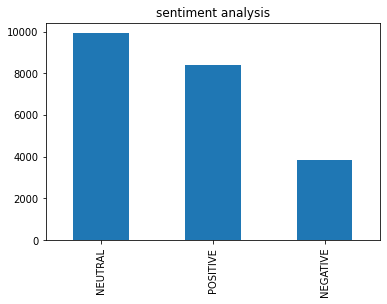

In [25]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

Finally, convert the sentiment analysis result in excel

In [26]:
df.to_excel('Initiation_Analisis VADER_Pre to Translate.xlsx')